# MIE 1624 - Assignment 2

Name: Fendi Halim Tjoa

Student ID: 100753017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn as scikit_learn
from scipy import stats    
import random
import statistics
import scipy.stats as st
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix, multilabel_confusion_matrix
%matplotlib inline

In [2]:
orig = pd.read_csv('clean_kaggle_data_2020.csv',low_memory=False) #uploading clean_kaggle_data_2020.csv

In [3]:
old_df = orig.copy()

# Part 1: Data Cleaning

While the data is made ready for analysis, several values are missing, and some features are
categorical. Note that some values that appear “null” indicate that a survey respondent did not select
that given option from a multiple-choice list. For example – “Which of the following hosted
notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Binder
/ JupyterHub”.


For the data cleaning step, handle missing values however you see fit and justify your approach.
Provide some insight on why you think the values are missing and how your approach might impact the overall analysis. Suggestions include filling the missing values with a certain value (e.g. mode
for categorical data) and completely removing the features with missing values. Secondly, convert
categorical data into numerical data by encoding and explain why you used this particular encoding
method.

These tasks can be done interchangeably, e.g., encoding can be done first.

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Cleaning up column names

In [5]:
old_df.loc[0]
old_df.columns = old_df.columns.str.upper() # Capitalized all column names
df = old_df.drop([0]) # Removing first row because it is not a data

Split data before pre-processing

In [6]:
X=df.drop(['Q24_ENCODED','Q24_BUCKETS'], axis=1) #separate X features
y=df[['Q24_ENCODED','Q24_BUCKETS']] #separate y target

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X,y, test_size=0.3, random_state=0) # splitting data 70% train, 30% test

In [7]:
# sanity check on shape
print(X.shape)
print(y.shape)
print(X_train_d.shape)
print(X_test_d.shape)
print(y_train_d.shape)
print(y_test_d.shape)

(10729, 355)
(10729, 2)
(7510, 355)
(3219, 355)
(7510, 2)
(3219, 2)


Filling empty values with mode. The reason we use mode is because the values are all categorical.

In [8]:
brokenlist = ['Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q13','Q15','Q20','Q21',
              'Q22','Q24','Q25','Q30','Q32','Q38'] #features that potentially have null values

# Filling X_train empty values with mode
for i in brokenlist:
    X_train_d[i] = X_train_d[i].fillna(X_train_d[i].mode()[0]) #filling empty values with mode of each column

<ipython-input-8-5259efc81f1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_d[i] = X_train_d[i].fillna(X_train_d[i].mode()[0]) #filling empty values with mode of each column


In [9]:
# Filling X_test empty values with mode
for i in brokenlist:
    X_test_d[i]= X_test_d[i].fillna(X_test_d[i].mode()[0]) #filling empty values with mode of each column

<ipython-input-9-70fd84c9d6ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_d[i]= X_test_d[i].fillna(X_test_d[i].mode()[0]) #filling empty values with mode of each column


In [10]:
X_train = X_train_d.copy()
X_test = X_test_d.copy()
y_train = y_train_d.copy()
y_test = y_test_d.copy()

Labeling all features that has "select all that apply" with 1 or 0. If there is value in the column, it will be labeled as 1, if it's null, it will be labeled as 0. Columns that have *Selected Choice - None* will not get cleaned and therefore they will have NaN values. The reason why I am leaving those is because drop those columns separately

In [11]:
X_test.iloc[:, np.r_[7:17, 19, 21:30, 32, 33:44, 46, 48:49, 51, 53:62, 64, 66:79, 81, 82:91, 93,
                     94:98, 100, 101:104, 106, 110:115, 117, 120:129, 131, 132:141, 143, 
                     144:152, 154, 155:170, 172, 174:186, 188, 190:195, 197, 198:207, 209,
                     210:218, 220, 221:228, 290, 231:240, 242, 244:253, 255, 256:265, 267,
                     268:277, 279, 280:288, 290, 291:306, 308, 309:321, 323, 324:329, 331,
                     332:341, 343, 344:352, 354]] = np.where(X_test_d.iloc[:, np.r_[7:17, 19, 21:30, 32, 33:44, 46, 48:49, 51, 53:62, 64, 66:79, 81, 82:91, 93,
                     94:98, 100, 101:104, 106, 110:115, 117, 120:129, 131, 132:141, 143, 
                     144:152, 154, 155:170, 172, 174:186, 188, 190:195, 197, 198:207, 209,
                     210:218, 220, 221:228, 290, 231:240, 242, 244:253, 255, 256:265, 267,
                     268:277, 279, 280:288, 290, 291:306, 308, 309:321, 323, 324:329, 331,
                     332:341, 343, 344:352, 354]].isnull(),0,1)

X_train.iloc[:, np.r_[7:17, 19, 21:30, 32, 33:44, 46, 48:49, 51, 53:62, 64, 66:79, 81, 82:91, 93,
                     94:98, 100, 101:104, 106, 110:115, 117, 120:129, 131, 132:141, 143, 
                     144:152, 154, 155:170, 172, 174:186, 188, 190:195, 197, 198:207, 209,
                     210:218, 220, 221:228, 290, 231:240, 242, 244:253, 255, 256:265, 267,
                     268:277, 279, 280:288, 290, 291:306, 308, 309:321, 323, 324:329, 331,
                     332:341, 343, 344:352, 354]] = np.where(X_train_d.iloc[:, np.r_[7:17, 19, 21:30, 32, 33:44, 46, 48:49, 51, 53:62, 64, 66:79, 81, 82:91, 93,
                     94:98, 100, 101:104, 106, 110:115, 117, 120:129, 131, 132:141, 143, 
                     144:152, 154, 155:170, 172, 174:186, 188, 190:195, 197, 198:207, 209,
                     210:218, 220, 221:228, 290, 231:240, 242, 244:253, 255, 256:265, 267,
                     268:277, 279, 280:288, 290, 291:306, 308, 309:321, 323, 324:329, 331,
                     332:341, 343, 344:352, 354]].isnull(),0,1)

Dropping columns that has *Selected Choice - None*

In [12]:
X_train_dropped = X_train.dropna(axis = 'columns')
X_test_dropped = X_test.dropna(axis = 'columns')

In [13]:
# sanity check on shape
print(X_train.shape)
print(X_test.shape)
print(X_train_dropped.shape)
print(X_test_dropped.shape)

(7510, 355)
(3219, 355)
(7510, 296)
(3219, 296)


## Encoding

In [14]:
nom_list = ['Q2','Q3','Q5','Q8','Q11','Q30','Q32','Q38'] # list of nominal categories. 
ord_list = ['Q1','Q4','Q6','Q13','Q15','Q20','Q21','Q22','Q25'] # list of ordinal categories. #Q24 is not listed in there because it is not a predictor

X_test.Q32 does not have Sisense value. We will have to create a dummy column containing Sisense for X_test in order to make the Train and Test data consistent

In [15]:
d = pd.DataFrame(0, index=np.arange(len(X_test_dropped)), columns=['Q2_Sisense'])

Encoding Ordinal Categorical Data (categorical variables with a natural implied order but the scale of difference is not defined)

In [16]:
# Ordering the ordinal categories
q1o = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']
q4o = ['I prefer not to answer','No formal education past high school','Some college/university study without earning a bachelor’s degree',
        'Professional degree','Bachelor’s degree','Master’s degree','Doctoral degree']
q6o = ['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']
q13o = ['Never','Once','2-5 times','6-25 times','More than 25 times']
q15o = ['I do not use machine learning methods','Under 1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years','20 or more years']
q20o = ['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees']
q21o = ['0','1-2','3-4','5-9','10-14','15-19','20+']
q22o = ['No (we do not use ML methods)',
        'I do not know',
        'We are exploring ML methods (and may one day put a model into production)',
       'We use ML methods for generating insights (but do not put working models into production)',
        'We recently started using ML methods (i.e., models in production for less than 2 years)',
       'We have well established ML methods (i.e., models in production for more than 2 years)']
q25o = ['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']

In [17]:
#ordinal train
oe = OrdinalEncoder(categories=[q1o,q4o,q6o,q13o,q15o,q20o,q21o,q22o,q25o])
ord_encoded_train = oe.fit_transform(X_train_dropped[ord_list])

ord_feature_encoded_train = pd.DataFrame(ord_encoded_train, 
                           columns= ord_list)

In [18]:
#ordinal test
oe = OrdinalEncoder(categories=[q1o,q4o,q6o,q13o,q15o,q20o,q21o,q22o,q25o])
ord_encoded_test = oe.fit_transform(X_test_dropped[ord_list])

ord_feature_encoded_test = pd.DataFrame(ord_encoded_test, 
                           columns= ord_list)

Encoding Nominal Categorical Data (categorical variables without implied order)

In [19]:
#nominal train
ohe = OneHotEncoder()
nom_encoded_train = ohe.fit_transform(X_train_dropped[nom_list]).toarray()
nom_feature_encoded_train = pd.DataFrame(nom_encoded_train, 
                           columns= ohe.get_feature_names(nom_list))

In [20]:
#nominal test
ohe = OneHotEncoder()
nom_encoded_test = ohe.fit_transform(X_test_dropped[nom_list]).toarray()
nom_feature_encoded_test = pd.DataFrame(nom_encoded_test, 
                           columns= ohe.get_feature_names(nom_list))

In [21]:
# sanity check shape
print(ord_feature_encoded_train.shape)
print(nom_feature_encoded_train.shape)
print(ord_feature_encoded_test.shape)
print(nom_feature_encoded_test.shape)

(7510, 9)
(7510, 126)
(3219, 9)
(3219, 125)


In [22]:
# list of select all apply for training data
select_all_apply_train = X_train.iloc[:, np.r_[7:17, 19, 21:30, 32, 33:44, 46, 48:49, 51, 53:62, 64, 66:79, 81, 82:91, 93,
                     94:98, 100, 101:104, 106, 110:115, 117, 120:129, 131, 132:141, 143, 
                     144:152, 154, 155:170, 172, 174:186, 188, 190:195, 197, 198:207, 209,
                     210:218, 220, 221:228, 290, 231:240, 242, 244:253, 255, 256:265, 267,
                     268:277, 279, 280:288, 290, 291:306, 308, 309:321, 323, 324:329, 331,
                     332:341, 343, 344:352, 354]]
select_all_apply_train.reset_index(drop=True, inplace=True) #reset index number

# list of select all apply for testing data
select_all_apply_test = X_test.iloc[:, np.r_[7:17, 19, 21:30, 32, 33:44, 46, 48:49, 51, 53:62, 64, 66:79, 81, 82:91, 93,
                     94:98, 100, 101:104, 106, 110:115, 117, 120:129, 131, 132:141, 143, 
                     144:152, 154, 155:170, 172, 174:186, 188, 190:195, 197, 198:207, 209,
                     210:218, 220, 221:228, 290, 231:240, 242, 244:253, 255, 256:265, 267,
                     268:277, 279, 280:288, 290, 291:306, 308, 309:321, 323, 324:329, 331,
                     332:341, 343, 344:352, 354]]
select_all_apply_test.reset_index(drop=True, inplace=True) #reset index number

Combine all the encodings. Now the X train and X test are free from categorical data

In [23]:
X_train_clean = pd.concat([ord_feature_encoded_train,nom_feature_encoded_train,select_all_apply_train],axis = 1) 
X_test_clean = pd.concat([ord_feature_encoded_test, nom_feature_encoded_test,select_all_apply_test,d],axis=1)
X_train_clean.columns = X_train_clean.columns.str.upper() #capitalized column names
X_test_clean.columns = X_test_clean.columns.str.upper() #capitalized column names

print(X_train_clean.shape) # check shape
print(X_test_clean.shape) # check shape

(7510, 413)
(3219, 413)


In [24]:
X_train_clean # clean train dataset

,Q1,Q4,Q6,Q13,Q15,Q20,Q21,Q22,Q25,Q2_MAN,...,Q34_B_OTHER,Q35_B_PART_1,Q35_B_PART_2,Q35_B_PART_3,Q35_B_PART_4,Q35_B_PART_5,Q35_B_PART_6,Q35_B_PART_7,Q35_B_PART_8,Q35_B_OTHER
0,4.0,5.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,5.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,5.0,6.0,1.0,3.0,0.0,1.0,2.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,5.0,1.0,2.0,1.0,0.0,1.0,4.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,4.0,1.0,1.0,1.0,4.0,6.0,5.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,5.0,5.0,1.0,0.0,1.0,4.0,6.0,1.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7506,3.0,6.0,3.0,1.0,4.0,0.0,1.0,3.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
7507,2.0,4.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,...,0,1,1,1,1,1,1,1,1,0
7508,3.0,5.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
X_test_clean # clean test dataset

,Q1,Q4,Q6,Q13,Q15,Q20,Q21,Q22,Q25,Q2_MAN,...,Q35_B_PART_1,Q35_B_PART_2,Q35_B_PART_3,Q35_B_PART_4,Q35_B_PART_5,Q35_B_PART_6,Q35_B_PART_7,Q35_B_PART_8,Q35_B_OTHER,Q2_SISENSE
0,4.0,5.0,0.0,0.0,1.0,4.0,6.0,4.0,3.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,7.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,5.0,3.0,0.0,3.0,0.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,5.0,4.0,0.0,4.0,2.0,4.0,2.0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,6.0,6.0,4.0,0.0,2.0,4.0,6.0,1.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3215,5.0,2.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3216,2.0,5.0,2.0,0.0,0.0,4.0,6.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3217,5.0,4.0,5.0,0.0,3.0,4.0,1.0,4.0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y_train.reset_index(drop=True, inplace=True) #reset index number for y train
y_test.reset_index(drop=True, inplace=True) #reset index number for y test

# Part 2 Exploratory data analysis and feature selection

For the exploratory data analysis step, visualize the order of feature importance. Some possible
methods include correlation plot, or a similar method. Given the data, which of the original
attributes in the data are most related to a survey respondent’s yearly compensation?

Explain how feature engineering is a useful tool in machine learning in the context of the tasks in
this assignment. Apply feature engineering and then select the features to be used for analysis
either manually or through some feature selection algorithm (e.g. regularized regression).

Not all features need to be used; features can be removed or added as desired. If the resulting
number of features is very high, dimensionality reduction can also be used (e.g. PCA). Use at
least one feature selection technique – describe the technique and provide justification on why
you selected that set of features.

Feature Selection

In [27]:
# Lasso Regression
from sklearn.linear_model import Lasso, LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

In [28]:
# Model 2 using Lasso Coefficient
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X_train_clean,y_train.Q24_ENCODED).coef_

In [29]:
f_select = pd.DataFrame(data=lasso_coef,columns = ["COEFFICIENTS"], index = X_train_clean.columns)
b = f_select.sort_values(by=['COEFFICIENTS'],ascending=False)
b.head(8)

,COEFFICIENTS
Q3_UNITED STATES OF AMERICA,3.964451
Q25,0.415629
Q1,0.324681
Q20,0.250819
Q15,0.226762
Q6,0.213094
Q22,0.143394
Q21,0.057973


In [30]:
# model 2 ready to be used
X_train_removal_model_2 = X_train_clean[['Q3_UNITED STATES OF AMERICA','Q25','Q1','Q20','Q15','Q6','Q22','Q21']] # select non-negative coefficients
X_test_removal_model_2 = X_test_clean[['Q3_UNITED STATES OF AMERICA','Q25','Q1','Q20','Q15','Q6','Q22','Q21']] # select non-negative coefficients

In [31]:
# model 3 random forest
from sklearn.ensemble import RandomForestRegressor

In [32]:
rf = RandomForestRegressor(n_estimators=100) #100 branches
rf.fit(X_train_clean, y_train.Q24_ENCODED)

RandomForestRegressor()

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
addthem1 = pd.DataFrame(data = X_train_clean.columns[sorted_idx], columns = ["FEATURE"])
addthem2 = pd.DataFrame(data = rf.feature_importances_[sorted_idx], columns = ["COEFFICIENT"])
addthem3 = pd.concat([addthem1, addthem2],axis = 1)
above_coe = addthem3.loc[addthem3["COEFFICIENT"] > 0.01].sort_values(by=["COEFFICIENT"], ascending = False)

# model 3 ready to be used
X_train_removal_model_3 = X_train_clean[above_coe["FEATURE"]] 
X_test_removal_model_3 = X_test_clean[above_coe["FEATURE"]] 

<AxesSubplot:>

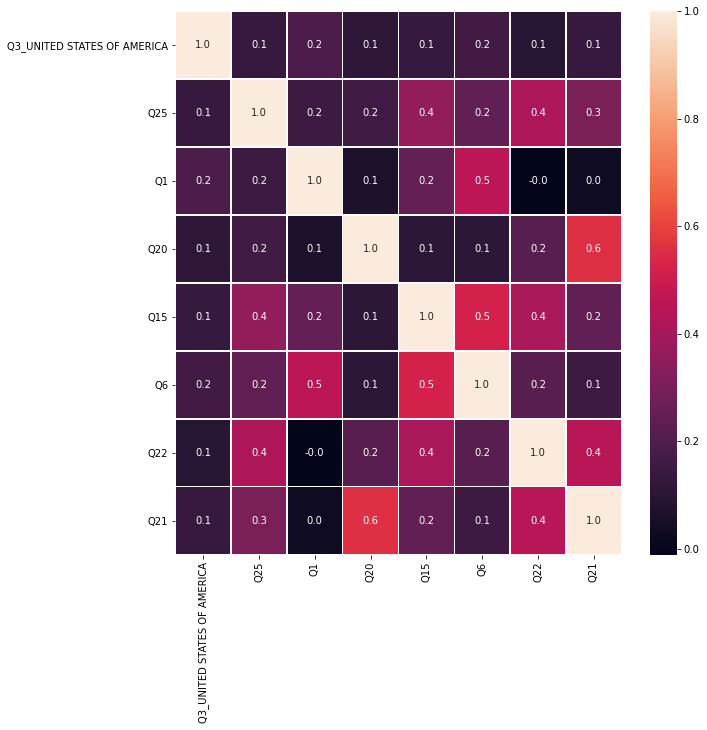

In [35]:
# heatmap of model 2
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_train_removal_model_2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<AxesSubplot:>

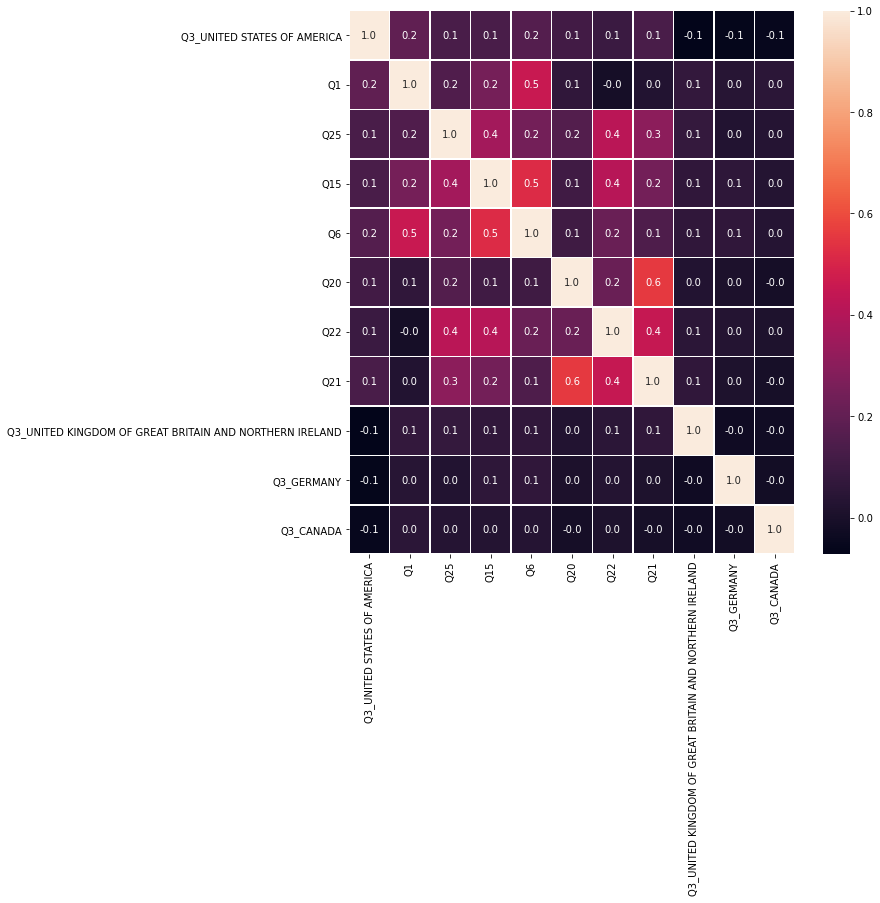

In [36]:
# heatmap of model 3
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_train_removal_model_3.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Part 3 Model implementation
Ordinal Logistic Regression

In [37]:
# cross validation and ordinal logistic regression
def run_kfold(model):
    
  X = X_train_removal_model_2
  Y = y_train.Q24_ENCODED
  kf = KFold(n_splits=10)
  
  outcomes_accuracy = []
  outcomes_f1 = []
  fold = 0
  
  # splitting the major training data using Kfold to cross validate for
  for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X.values[train_index], X.values[test_index]
    Y_train, Y_test = Y.values[train_index], Y.values[test_index]

    # creating a dataframe of list of target greater than 0,1,2,3,...13
    derived_data = []
    for i in np.unique(Y_train):
      target_greater_data = np.where(i < Y_train,1,0)
      if i == max(Y_train):
        break
      else:
        derived_data.append(target_greater_data)
    derived_ordinal_target = pd.DataFrame(derived_data).T


    # creating a list of probability between class 0 vs all, class <0 vs the remaining, class <1 vs the remaining, etc... 
    probo = []
    for i in range(0,derived_ordinal_target.shape[1]):
      # print(i)
      model.fit(X_train,derived_ordinal_target[i]) ### fit
      # print('Tuned hpyerparameters :(best parameters) ',model.best_params_)
      # print(i)
      probo.append(model.predict_proba(X_test)) ### predict
      # print('Tuned hpyerparameters :(best parameters) ',model.best_params_)
      # print(i)


    # slicing my probo array to just take index 0
    splitter = []
    for i in range(0,derived_ordinal_target.shape[1]):
      splitter.append(probo[i][:,:1].ravel())
      
    # creating a dataframe containing derived probability between class 0 vs all, class <0 vs the remaining, class <1 vs the remaining, etc...
    list_of_13 = pd.DataFrame(splitter)
    list_of_14 = pd.DataFrame(probo[13][:,1:].ravel())
    combined_list_probab = pd.concat([list_of_13.T,list_of_14], axis =1)
    combined_list_probab.columns = np.arange(0,15) # hence this is not clean yet

    # creating arrays containing probability of each class
    list_of_substraction = []
    for i in range(0,15):
      if i == 0:
        list_of_substraction.append(combined_list_probab[i])
      elif i == 14:
        list_of_substraction.append(combined_list_probab[i])
      else:
        list_of_substraction.append(combined_list_probab[i] - combined_list_probab[i-1])

    # creating a dataframe using the array from above
    table_of_probability = pd.DataFrame(list_of_substraction).T
    table_of_probability.columns = np.arange(0,15)
    table_of_probability.add_prefix('Class_')
    result = table_of_probability.idxmax(axis=1)


    # creating a dataframe consisting of the classified result
    prediction_1 = pd.DataFrame(result, columns = ['TARGET_PREDICTED'])
    accuracy = accuracy_score(Y_test, prediction_1) 
    outcomes_accuracy.append(accuracy)
    f1 = f1_score(Y_test, prediction_1,average='micro',labels=np.unique(prediction_1))
    outcomes_f1.append(f1)
    print("Fold {0} accuracy: {1}".format(fold, accuracy))
    print("Fold {0} F1_SCORE: {1}".format(fold, f1))
    print("")

  mean_outcome_accuracy = np.mean(outcomes_accuracy)
  std_outcome_accuracy=np.std(outcomes_accuracy)
  var_outcome_accuracy=np.var(outcomes_accuracy)
  print("Mean accuracy_score: {0}".format(mean_outcome_accuracy)) 
  print("Standard Deviation: {0}".format(std_outcome_accuracy)) 
  print("Variance: {0}".format(var_outcome_accuracy)) 
  
  print("")
  mean_outcome_f1 = np.mean(outcomes_f1)
  std_outcome_f1=np.std(outcomes_f1)
  var_outcome_f1=np.var(outcomes_f1)
  print("Mean f1_score: {0}".format(mean_outcome_f1)) 
  print("Standard Deviation: {0}".format(std_outcome_f1)) 
  print("Variance: {0}".format(var_outcome_accuracy)) 
  return Y_test, prediction_1


In [38]:
# running running the model to see accuracy and f1 score across the fold without tuning
model_lr = LogisticRegression()
y_train_cv, y_pred_cv = run_kfold(model_lr)

Fold 1 accuracy: 0.45272969374167776
Fold 1 F1_SCORE: 0.5551020408163265

Fold 2 accuracy: 0.4181091877496671
Fold 2 F1_SCORE: 0.4964426877470355

Fold 3 accuracy: 0.45139813581890814
Fold 3 F1_SCORE: 0.5481002425222312

Fold 4 accuracy: 0.4274300932090546
Fold 4 F1_SCORE: 0.5413153456998314

Fold 5 accuracy: 0.43275632490013316
Fold 5 F1_SCORE: 0.5439330543933054

Fold 6 accuracy: 0.4340878828229028
Fold 6 F1_SCORE: 0.5305126118795769

Fold 7 accuracy: 0.4274300932090546
Fold 7 F1_SCORE: 0.5232273838630807

Fold 8 accuracy: 0.43541944074567246
Fold 8 F1_SCORE: 0.5396039603960395

Fold 9 accuracy: 0.4367509986684421
Fold 9 F1_SCORE: 0.539917695473251

Fold 10 accuracy: 0.42609853528628494
Fold 10 F1_SCORE: 0.5284888521882741

Mean accuracy_score: 0.43422103861517974
Standard Deviation: 0.010321936072587749
Variance: 0.00010654236428658821

Mean f1_score: 0.5346643874978952
Standard Deviation: 0.015580236810312694
Variance: 0.00010654236428658821


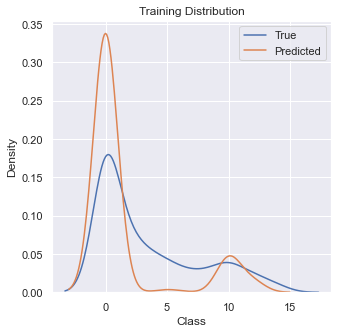

In [39]:
# Training distribution
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(y_train_cv,label = 'True')
sns.kdeplot(y_pred_cv.TARGET_PREDICTED,label = 'Predicted')
plt.xlabel("Class")
plt.title("Training Distribution")
plt.legend()
plt.show()

# Part 4: Model Tuning

According to https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/, logistic regression does not really have any critical hyperparameters to tune. Therefore C and solver the two choices that prefered. These two choices are also the robust hyperparameter that can be used without conflicting with other (for example, l2 penalty cannot be used with solver = linear)

In [40]:
model = LogisticRegression()
kf = KFold(n_splits=10)
best_accuracy = 0
best_f1 = 0
best_confusion = 0

# grid search using C and Solver as hyperparameters
for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
  for solver in ['newton-cg','lbfgs','liblinear','sag']:
    # print("Using C:", C, "and", "solver:", solver)
  # for penalty in ['l1','l2','elasticnet','none']:
    # model = LogisticRegression(C=C, penalty=penalty)
    model = LogisticRegression(C=C, solver=solver)
    accuracy = np.zeros(10)
    f1_list = np.zeros(10)
    confusion = np.zeros(10)
    np_idx = 0

    # splitting the major training data using Kfold to cross validate for
    fold = 0
    for train_idx, test_idx in kf.split(X_train_removal_model_2):
      fold += 1
      X_TRAIN, X_TEST = X_train_removal_model_2.values[train_idx], X_train_removal_model_2.values[test_idx]
      Y_TRAIN, Y_TEST = y_train.Q24_ENCODED.values[train_idx], y_train.Q24_ENCODED.values[test_idx]

      # creating a dataframe of list of target greater than 0,1,2,3,...13
      derived_data = []
      for i in np.unique(Y_TRAIN):
        target_greater_data = np.where(i < Y_TRAIN,1,0)
        if i == max(Y_TRAIN):
          break
        else:
          derived_data.append(target_greater_data)
      derived_ordinal_target = pd.DataFrame(derived_data).T
      
      # creating a list of probability between class 0 vs all, class <0 vs the remaining, class <1 vs the remaining, etc... 
      probo = []
      for i in range(0,derived_ordinal_target.shape[1]):
        model.fit(X_TRAIN,derived_ordinal_target[i]) # fit
        probo.append(model.predict_proba(X_TEST)) # predict binary classification

      # slicing my probo array to just take index 0
      splitter = []
      for i in range(0,derived_ordinal_target.shape[1]):
        splitter.append(probo[i][:,:1].ravel())

      # creating a dataframe containing derived probability between class 0 vs all, class <0 vs the remaining, class <1 vs the remaining, etc...
      list_of_13 = pd.DataFrame(splitter)
      list_of_14 = pd.DataFrame(probo[13][:,1:].ravel())
      combined_list_probab = pd.concat([list_of_13.T,list_of_14], axis =1)
      combined_list_probab.columns = np.arange(0,15) # hence this is not clean yet

      # creating arrays containing probability of each class
      list_of_substraction = []
      for i in range(0,15):
        if i == 0:
          list_of_substraction.append(combined_list_probab[i])
        elif i == 14:
          list_of_substraction.append(combined_list_probab[i])
        else:
          list_of_substraction.append(combined_list_probab[i] - combined_list_probab[i-1])

      # creating a dataframe using the array from above
      table_of_probability = pd.DataFrame(list_of_substraction).T
      table_of_probability.columns = np.arange(0,15)
      result = table_of_probability.idxmax(axis=1)

      # creating a dataframe consisting of the classified result
      prediction_1 = pd.DataFrame(result, columns = ['TARGET_PREDICTED'])
      accuracy_acc = accuracy_score(Y_TEST, prediction_1)
      f1 = f1_score(Y_TEST, prediction_1,average='micro', labels=np.unique(prediction_1)) 
      
      # calculating performance using different metrics
      accuracy[np_idx] = accuracy_acc
      f1_list[np_idx] = f1
      np_idx += 1
    
    # storing best accuracy value
    if np.mean(accuracy) > best_accuracy:
      best_params_accuracy = {'C':C, 'solver':solver}
      best_accuracy = np.mean(accuracy)
      best_std_accuracy = np.std(accuracy)
      best_var_accuracy = np.var(accuracy)

    # storing f1 score value
    if np.mean(f1_list) > best_f1:
      best_params_f1 = {'C':C, 'solver':solver}
      best_f1 = np.mean(f1_list)
      best_std_f1 = np.std(f1_list)
      best_var_f1 = np.var(f1_list)

# print out the best parameter and its results according to accuracy
print(best_params_accuracy)
print("Best Accuracy: {}%({}%)".format(round(best_accuracy*100,3),round(best_std_accuracy*100,3)))
print("Variance: {}%".format(round(best_var_accuracy*100,3)))
print("")

# print out the best parameter and its results according to f1 score
print(best_params_f1)
print("Best Micro AVG F1-Score: {}%({}%)".format(round(best_f1*100,3),round(best_std_f1*100,3)))
print("Variance: {}%".format(round(best_var_f1*100,3)))  

{'C': 5, 'solver': 'sag'}
Best Accuracy: 43.462%(1.021%)
Variance: 0.01%

{'C': 0.001, 'solver': 'liblinear'}
Best Micro AVG F1-Score: 56.011%(1.021%)
Variance: 0.01%


There are 2 types of metrics to measure how good the model is. Micro F1 Score will be primarily used because the dataset is unbalanced (there are more class 0 vs the other)

# Part 5: Testing & Discussion

Model implementation

In [41]:
# input clean x_test with data encoded and bad features removed
def ordinal_regression(x_input):
  clf_lr = LogisticRegression( C = 0.01, solver = 'liblinear') ### use the best setting 

  final_y_train = y_train.Q24_ENCODED.copy()
  final_x_train = X_train_removal_model_2.copy()
  derived_data = []
  for i in np.unique(final_y_train):
    target_greater_data = np.where(i < final_y_train,1,0)
    if i == max(final_y_train):
      break
    else:
      derived_data.append(target_greater_data)
  derived_ordinal_target = pd.DataFrame(derived_data).T
  
  # creating a list of probability between class 0 vs all, class <0 vs the remaining, class <1 vs the remaining, etc... 
  probo = []
  for i in range(0,derived_ordinal_target.shape[1]):
    # print(i)
    clf_lr.fit(final_x_train,derived_ordinal_target[i]) ## fit
    probo.append(clf_lr.predict_proba(x_input)) ## predict binary classification

  # slicing my probo array to just take index 0
  splitter = []
  for i in range(0,derived_ordinal_target.shape[1]):
    splitter.append(probo[i][:,:1].ravel())

  # creating a dataframe containing derived probability between class 0 vs all, class <0 vs the remaining, class <1 vs the remaining, etc...
  list_of_13 = pd.DataFrame(splitter)
  list_of_14 = pd.DataFrame(probo[13][:,1:].ravel())
  combined_list_probab = pd.concat([list_of_13.T,list_of_14], axis =1)
  combined_list_probab.columns = np.arange(0,15) # hence this is not clean yet

  # creating arrays containing probability of each class
  list_of_substraction = []
  for i in range(0,15):
    if i == 0:
      list_of_substraction.append(combined_list_probab[i])
    elif i == 14:
      list_of_substraction.append(combined_list_probab[i])
    else:
      list_of_substraction.append(combined_list_probab[i] - combined_list_probab[i-1])

  # creating a dataframe using the array from above
  table_of_probability = pd.DataFrame(list_of_substraction).T
  table_of_probability.columns = np.arange(0,15)
  # table_of_probability.add_prefix('Class_')
  result = table_of_probability.idxmax(axis=1)

  # creating a dataframe consisting of the classified result
  prediction_1 = pd.DataFrame(result, columns = ['TARGET_PREDICTED'])
  return prediction_1
  

In [42]:
# predicting using ordinal_regression function created above
my_prediction = ordinal_regression(X_test_removal_model_2) # input clean x_test with data encoded and bad features removed

In [43]:
# f1_score 
final_f1_score = f1_score(y_test.Q24_ENCODED,my_prediction, average = 'micro',labels=np.unique(my_prediction))
print("F1 Score:", final_f1_score)

F1 Score: 0.521806252412196


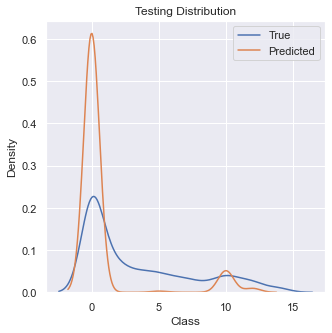

In [44]:
# Testing distribution
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(y_test.Q24_ENCODED, label = "True")
sns.kdeplot(my_prediction.TARGET_PREDICTED, label = "Predicted")
plt.xlabel("Class")
plt.legend()
plt.title("Testing Distribution")
plt.show()